$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{University of Los Andes}$$
$$\textrm{High Energy Physics Group: Phenomenology of Particles}$$

This code was written to be running in Docker. If you do not have a Docker inside hep-server2 please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales

$\textbf{Preliminaries}$ 

The libraries used here are:

In [1]:
import os, sys
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
from delphes_reader import root_analysis #It contains some useful functions like make_histograms or get_kinematics_row.

from ROOT import TCanvas #It is necessary to show plots with ROOT.
from ROOT import TH1F #It is necessary to plot histograms with ROOT.
from ROOT import THStack #It is necessary to plot many histograms at the same time with ROOT.
from ROOT import TLegend #It is necessary to plot labels when you plot many histograms at the same time with ROOT.

import pandas as pd #Python library is useful for data science.

Welcome to JupyROOT 6.22/06


Until now, we created .csv files. Now we will use it to plot histograms.

**1. Read .csv files:**

To do this, we can use pandas:

In [3]:
Datasets = {'z': pd.read_csv('Data_z.csv'),
            'stop': pd.read_csv('Data_stop.csv'),
            'ttbar': pd.read_csv('Data_ttbar.csv'),
            'ww': pd.read_csv('Data_ww.csv')}

So,

In [4]:
Datasets['stop']

,pT_{Z}(GeV),#eta_{Z},#phi_{Z},Energy_{Z}(GeV),Mass_{Z}(GeV)
0,45.543166,0.735161,1.892232,82.497517,58.254290
1,35.550365,1.996663,1.769846,206.594030,157.820829
2,84.196153,0.313676,-2.886560,120.883981,82.481878
3,86.960182,-1.412185,1.208230,326.145743,265.747893
4,91.563436,-0.412365,0.019620,118.831570,65.029120
...,...,...,...,...,...
105,21.610681,-0.454527,1.769293,54.326556,48.795891
106,12.571026,-2.995276,-2.941065,156.371798,92.651876
107,29.884160,-0.396376,-1.633173,155.670568,152.290663
108,103.799067,-0.111048,0.628315,184.619288,152.238708


**2. Plot histograms with matplotlib using Uniandes_Framework:**

In python, it is very common to think in Matplotlib when you want to plot something. We create a function to plot whatever Dataset column using Matplotlib:

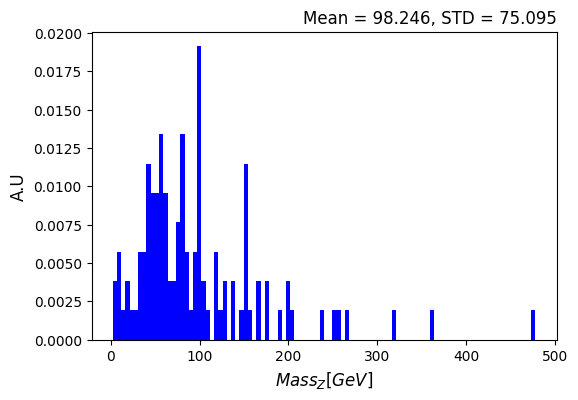

In [5]:
root_analysis.histos_matplotlib(Datasets['stop'], 'Mass_{Z}(GeV)') #This function also has other parameters to select nbins, color, log10 scale, or save the plot in a file.

However, in High Energy Physics people usually tend to use ROOT. By this, we made a more complex function to create all the histograms contained in a DataFrame using ROOT.

**3. Create histograms:**

We can use the function **root_analysis.makehistograms()**. If we want to generate all the histograms for each column on Datasets['stop'], it is enough to run the following code:

In [6]:
root_analysis.make_histograms(Datasets['stop'])

{'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e0732cb0>,
 '#eta_{Z}': <cppyy.gbl.TH1F object at 0x55a1e04edc40>,
 '#phi_{Z}': <cppyy.gbl.TH1F object at 0x55a1de11e1b0>,
 'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1dfe5f950>,
 'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e0751a60>}

This function returns a directory with TH1F objects (ROOT histograms).

We can do this with all Datasets and save all dictionaries inside a bigger dictionary:

In [7]:
Histos_Dictionary = {'z': root_analysis.make_histograms(Datasets['z']),
                    'stop': root_analysis.make_histograms(Datasets['stop']),
                    'ttbar': root_analysis.make_histograms(Datasets['ttbar']),
                    'ww': root_analysis.make_histograms(Datasets['ww'])}

In [8]:
Histos_Dictionary

{'z': {'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e07587a0>,
  '#eta_{Z}': <cppyy.gbl.TH1F object at 0x55a1e0733a40>,
  '#phi_{Z}': <cppyy.gbl.TH1F object at 0x55a1e074f060>,
  'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e07403d0>,
  'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e072b840>},
 'stop': {'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e073e290>,
  '#eta_{Z}': <cppyy.gbl.TH1F object at 0x55a1e07184e0>,
  '#phi_{Z}': <cppyy.gbl.TH1F object at 0x55a1e0718bb0>,
  'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e0772540>,
  'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e0730740>},
 'ttbar': {'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e0730fd0>,
  '#eta_{Z}': <cppyy.gbl.TH1F object at 0x55a1e0748660>,
  '#phi_{Z}': <cppyy.gbl.TH1F object at 0x55a1e075e590>,
  'Energy_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1e075ee50>,
  'Mass_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1de12a770>},
 'ww': {'pT_{Z}(GeV)': <cppyy.gbl.TH1F object at 0x55a1de12b070>,
  '#eta_{

Now, if we want to plot one of them. We can use TCanvas:

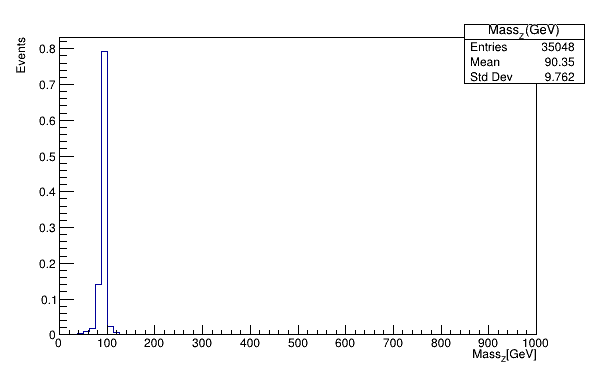

In [9]:
canvas = TCanvas("Canvas", " ", 600, 400)
Histos_Dictionary['z']['Mass_{Z}(GeV)'].Draw('hist')
canvas.Draw()

**4. Overlap or Stack histograms:**

We can use the function **root_analysis.overlap_histos()**. This function has two main parameters: kinematic_variable and Dict_Histos, they are a string with the name of the kinematic variable and the directory with all the histograms (it should be a directory with the same structure that we use in this tutorial) respectively.

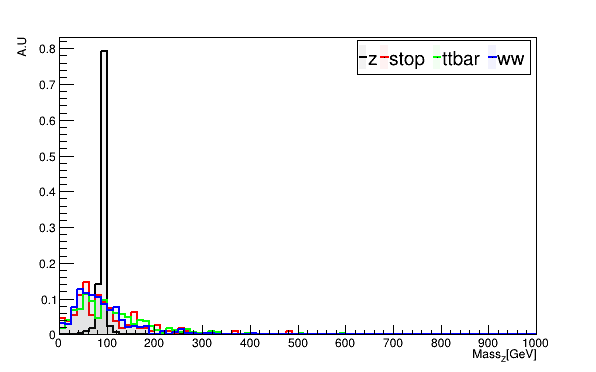

In [10]:
Histos, Canva, Legend = root_analysis.overlap_histos(kinematic_variable= 'Mass_{Z}(GeV)', 
                                                     Dict_Histos= Histos_Dictionary)

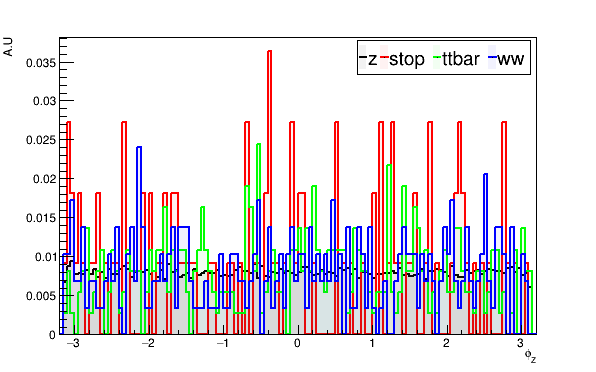

In [11]:
Histos, Canva, Legend = root_analysis.overlap_histos(kinematic_variable= '#phi_{Z}', 
                                                     Dict_Histos= Histos_Dictionary)

If we want to Stack we have to add Stack = True as other parameter inside the function:

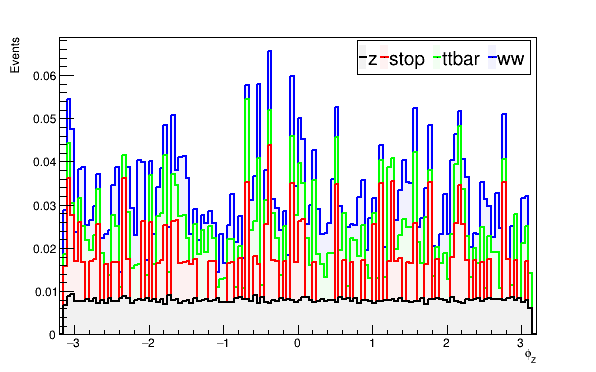

In [12]:
Histos, Canva, Legend = root_analysis.overlap_histos(kinematic_variable= '#phi_{Z}', 
                                                     Dict_Histos= Histos_Dictionary,
                                                     Stack= True)

Of course, before doing that we have to care about the normalization of each histogram. 

**This code is written to stack histograms that are normalized about the number of physical events.**

**5. Sum histograms:**

We can use the function **root_analysis.sum_histos()** and put as a parameter a list with the histograms that we want to sum.

In [13]:
Histos_for_sum = [Histos_Dictionary['z']['#phi_{Z}'], Histos_Dictionary['ww']['#phi_{Z}'], Histos_Dictionary['ttbar']['#phi_{Z}']]

In [14]:
Histo = root_analysis.sum_histos(Histos_for_sum)

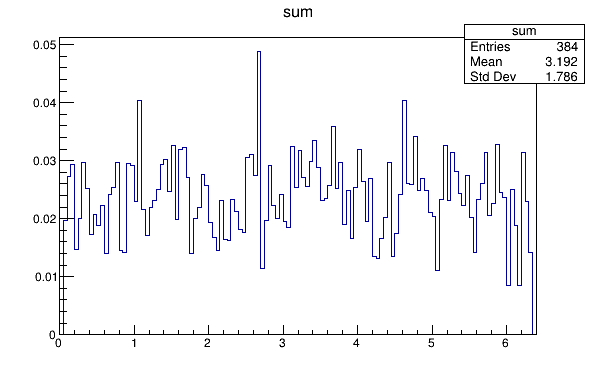

In [15]:
canvas = TCanvas("sum_histos", " ", 600, 400)
Histo.Draw('hist')
canvas.Draw()

Again, before do that we have to care about normalization of each histograms. 

**This code is written to sum histograms that are normalized about the number of physical events.**

Conclusion: **Working with the correct normalization is the user responsibility.**

**6. Save histograms in a .root file**

We still do not have a function to save histograms in a .root file. Nevertheless, please refer to: https://github.com/Phenomenology-group-uniandes/Tutoriales_Generales/blob/main/5_Uproot_guardado_y_lectura_en_archivos_root.ipynb

In this reference, it is explained how to save histograms easily using Uproot.